In [1]:
### Includes
%matplotlib inline
import matplotlib.pyplot as plt

Weights = [5, 2] # F(X) = 5x_0 + 2x_1
F = lambda W, X: sum([w*x for w,x in zip(W,X)])

dataX1 = range(-2, 11, 1)
dataX0 = [1]*len(dataX1)

data = (list(zip(dataX0, dataX1)))
print (data)
Y = [F(Weights, X) for X in data]
print (Y)



[(1, -2), (1, -1), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10)]
[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]


In [2]:
TrainingData1 = zip(data, Y)

print (list(TrainingData1))

[((1, -2), 1), ((1, -1), 3), ((1, 0), 5), ((1, 1), 7), ((1, 2), 9), ((1, 3), 11), ((1, 4), 13), ((1, 5), 15), ((1, 6), 17), ((1, 7), 19), ((1, 8), 21), ((1, 9), 23), ((1, 10), 25)]


[((1, -2), 6.49), ((1, -1), -0.65), ((1, 0), 7.17), ((1, 1), -4.85), ((1, 2), 19.8), ((1, 3), 8.27), ((1, 4), 21.94), ((1, 5), 15.75), ((1, 6), 30.92), ((1, 7), 18.15), ((1, 8), 30.28), ((1, 9), 37.87), ((1, 10), 19.47)]


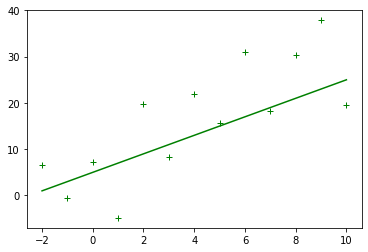

In [3]:
## Add Noise
import random
import numpy as np
EPS = 30
yNoise = [round(y+random.random()*EPS-EPS/2,2) for y in Y]
TrainingData2 = zip(data, yNoise)
print(list(TrainingData2))

plt.plot(dataX1, Y, "g")
plt.plot(dataX1, yNoise, "g+")
plt.show()

In [4]:
data = [((1, -2), 1), ((1, -1), 3), ((1, 0), 5), ((1, 1), 7), ((1, 2), 9), ((1, 3), 11), ((1, 4), 13), ((1, 5), 15), ((1, 6), 17), ((1, 7), 19), ((1, 8), 21), ((1, 9), 23), ((1, 10), 25)]
#print(data)
X = [d for d,_ in data]
Y = [y for _, y in data]

alpha=0.01
model=[0, 0]
Errors = []

In [21]:
yPredicted = [F(model, x) for x in X]
#print(yPredicted)

# Evaluate Model
Error = sum([(r-y)**2.0 for r,y in zip(Y, yPredicted)])
# Evaluate Model
Error = sum([(r-y)**2.0 for r,y in zip(Y, yPredicted)])
print("With Model=", model, "Error=", Error)
Errors.append([model, Error])
print ("History w/ Alpha=", alpha, "=")
print (Errors)
print("Next")
for i in range(len(Errors)):
  print("Iterations=",i+1,":=",Errors[i])

#weight trainig 
deltaX0 = 1/len(Y)*sum( [(-2*(r-y)*x[0]) for r,y,x in zip(Y, yPredicted, X)] )
deltaX1 = 1/len(Y)*sum( [(-2*(r-y)*x[1]) for r,y,x in zip(Y, yPredicted, X)] )

#print(deltaX0)
#print(deltaX1)
model = [model[0]-alpha*deltaX0, model[1]-alpha*deltaX1]
print(model)

With Model= [0.764535362303952, 2.5732780816433167] Error= 108.85941462527283
History w/ Alpha= 0.01 =
[[[0, 0], 2925.0], [[0.26, 1.6], 551.6628], [[0.38680000000000003, 2.2192], 190.23375696000002], [[0.46152800000000005, 2.456736], 133.547608044864], [[0.5157585600000001, 2.54577216], 123.05079433117587], [[0.5617816160000001, 2.5770481792], 119.58431886158289], [[0.604382129344, 2.5858767424], 117.21685237894025], [[0.64542434736512, 2.58600012661248], 115.04946044688809], [[0.6856358502888192, 2.5827661028557825], 112.94538425067927], [[0.7253018450545803, 2.5782555731192076], 110.88330888959752], [[0.764535362303952, 2.5732780816433167], 108.85941462527283]]
Next
Iterations= 1 := [[0, 0], 2925.0]
Iterations= 2 := [[0.26, 1.6], 551.6628]
Iterations= 3 := [[0.38680000000000003, 2.2192], 190.23375696000002]
Iterations= 4 := [[0.46152800000000005, 2.456736], 133.547608044864]
Iterations= 5 := [[0.5157585600000001, 2.54577216], 123.05079433117587]
Iterations= 6 := [[0.5617816160000001,

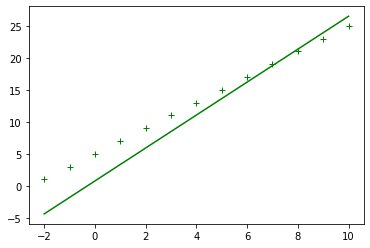

In [22]:

dataX1 = [x[1] for x, y in data]
plt.plot(dataX1, yPredicted, "g")
plt.plot(dataX1, Y, "g+")
plt.show()

In [1]:
import torch
import torchvision
from torchvision import transforms , datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchsummary import summary # for model summary
import matplotlib.pyplot as plt # for ploting our data and showing images

class NetModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 3)
        self.fc2 = nn.Linear(3, 1)
        #self.fc3 = nn.Linear(64, 64)
        #self.fc4 = nn.Linear(64, 10)
            
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
        #x = F.relu(self.fc3(x))
        #x = self.fc4(x)
        #return F.log_softmax(x, dim = 1)

#run model on gpu
device = torch.device("cuda") 
myModel = NetModel().to(device)

In [3]:
# display the componets of the model
#print(myModel) # simple but crappy 
summary(myModel, input_size = (1,2) ) # nice

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 3]               9
            Linear-2                 [-1, 1, 1]               4
Total params: 13
Trainable params: 13
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [4]:
test_input = torch.rand(2).to(device)
test_input = test_input.view(-1,2)
output = myModel(test_input)

print(output)

tensor([[0.3069]], device='cuda:0', grad_fn=<AddmmBackward>)


In [ ]:
#train
optimizer = optim.Adam(myModel.parameters(), lr = 0.0001)
EPOCHS = 3 # how many time to iterate over our whole training set

for epoch in range(EPOCHS):
    for data in trainset:
        data_images_batch, data_labels_batch = data
        myModel.zero_grad() # zero our accumilated gradients
        batch_output = myModel(data_images_batch.view(-1,28*28).to(device))
        loss = F.nll_loss(batch_output, data_labels_batch.to(device))
        loss.backward()
        optimizer.step()
    print(loss)

In [ ]:
#eval
correct = 0 
total = 0

with torch.no_grad():
    for data in testset:
        test_images_batch, test_labels_batch = data
        batch_output = myModel(test_images_batch.view(-1,28*28).to(device))
        for idx, i in enumerate(batch_output):
            if torch.argmax(i) == test_labels_batch[idx]:
                correct += 1
            total += 1
            
print("Accuracy: ", round(correct/total,3))